In [1]:
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 30.9 MB/s 
     |████████████████████████████████| 268 kB 54.9 MB/s 
     |████████████████████████████████| 1.3 MB 43.4 MB/s 
     |████████████████████████████████| 1.7 MB 48.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 50.2 MB/s 
     |████████████████████████████████| 3.3 MB 50.6 MB/s 
     |████████████████████████████████| 25.9 MB 2.9 MB/s 
     |████████████████████████████████| 636 kB 55.1 MB/s 
     |████████████████████████████████| 2.0 MB 41.4 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 10.4 MB 49.7 MB/s 
     |████████████████████████████████|

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install pycaret-ts-alpha


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 15.8 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 79.9 MB 57 kB/s 
     |████████████████████████████████| 24.8 MB 1.9 MB/s 
     |████████████████████████████████| 282 kB 50.9 MB/s 
     |████████████████████████████████| 1.8 MB 42.5 MB/s 
     |████████████████████████████████| 69 kB 5.6 MB/s 
     |████████████████████████████████| 3.3 MB 26.7 MB/s 
     |████████████████████████████████| 199 kB 56.5 MB/s 
     |████████████████████████████████| 6.5 MB 41.1 MB/s 
     |████████████████████████████████| 303 kB 39.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 11.2 MB 46.3 MB/s 
     |████████████████████████████████| 15.7 MB 34.8 MB/s 
     |████████████████████████████████| 199 kB 41.2 MB/s 
     |████████████████████████████

In [1]:
from pycaret.time_series import *

import pandas as pd

data = pd.read_csv('yahoo_stock.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', drop = True, inplace = True)

ts = setup(
    data=data,
    target='Volume',
    fh=48,
    numeric_imputation_target="ffill",
    numeric_imputation_exogenous="ffill",
    # Set defaults for the plots ----
    fig_kwargs={"renderer": "notebook", "width": None, "height": 600},
    session_id=42
)


INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: d270
INFO:logs:self.variable_keys: {'logging_param', 'y_train', 'exp_id', 'display_container', '_all_models_internal', 'X_train', 'experiment__', 'variable_keys', 'pipeline', '_all_models', 'fold_generator', 'X_test', 'primary_sp_to_use', 'enforce_exogenous', 'idx', '_all_metrics', 'X_train_transformed', 'fold_groups_param_full', 'X_test_transformed', 'enforce_pi', '_gpu_n_jobs_param', 'n_jobs_param', 'seasonality_present', 'y_test_transformed', 'fold_param', 'X_transformed', 'data', 'approach_type', 'log_plots_param', 'memory', '_available_plots', 'exp_name_log', 'strictly_positive', 'index_type', 'exogenous_present', 'html_param', '_ml_usecase', 'gpu_param', 'all_sp_values', 'X', 'master_model_container', 'seasonal_period', 'seed', 'y_transformed', 'fh', 'y', 'y_test', 'y_train_transfor

,Description,Value
0,session_id,42
1,Target,Volume
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(1825, 6)"
5,Train data shape,"(1777, 6)"
6,Test data shape,"(48, 6)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 6.01s...............


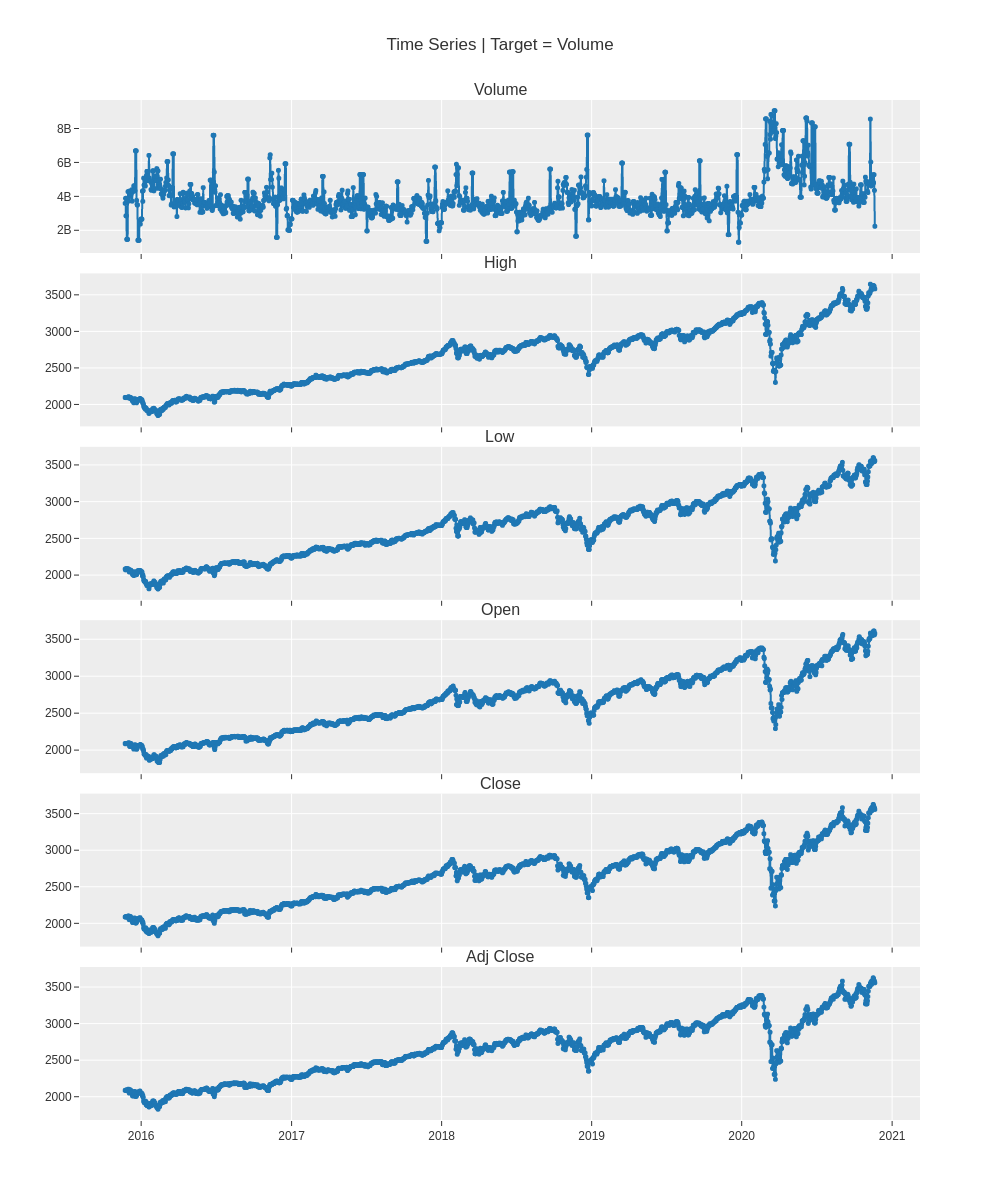

INFO:logs:Visual Rendered Successfully


In [2]:
plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

In [9]:
model = create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-05-12,2.530968e+09,3.000899e+09,0.3844,0.5009,3.8024,2.9492,-3.4046
1,2020-06-29,3.998693e+09,4.722160e+09,0.9345,1.3568,5.8195,4.5195,-98.7166
2,2020-08-16,8.063575e+08,1.093653e+09,0.1772,0.1990,1.1714,1.0434,-0.8261
Mean,NaT,2.445339e+09,2.938904e+09,0.4987,0.6856,3.5978,2.8374,-34.3158
SD,NaT,1.304671e+09,1.481980e+09,0.3195,0.4904,1.9031,1.4213,45.5504


INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ARIMA(order=(0, 1, 0), seasonal_order=(0, 1, 0, 24))
INFO:logs:create_model() successfully completed......................................


In [12]:
plot_model(model)


Output hidden; open in https://colab.research.google.com to view.